<a href="https://colab.research.google.com/github/Gyanprakash136/Machine-learning-mini-projects/blob/main/base_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random  as rd

In [ ]:
df = pd.read_csv(r"/content/Mall_Customers.csv")


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df.iloc[:,3:]

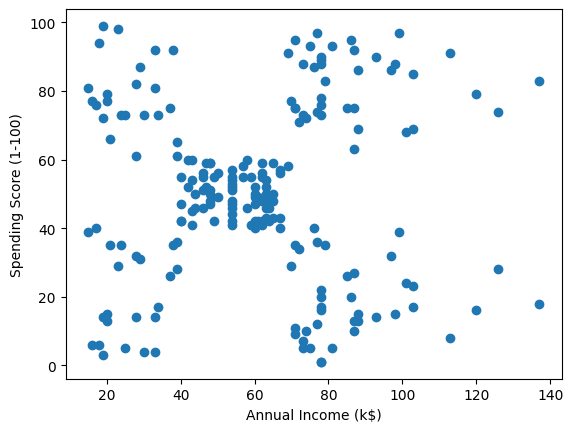

In [ ]:
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

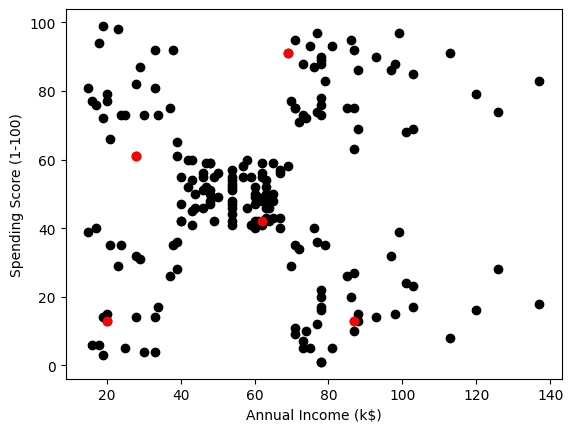

In [ ]:
k = 5
Centroids = X.sample(k)
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],color="black")
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],color="red")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [ ]:
diff = 1
j = 0
while(diff!=0):
  XD = X.copy() # Create a copy to avoid modifying the original X during iteration
  i = 1
  distance_cols = []
  for index1,row_c in Centroids.iterrows():
    ED = []
    for index2,row_d in XD.iterrows():
      d1 = (row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
      d2 = (row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
      d = np.sqrt(d1+d2)
      ED.append(d)
    # Create new columns for distances using descriptive names
    X[f'Distance_to_Centroid_{i}'] = ED
    distance_cols.append(f'Distance_to_Centroid_{i}')
    i = i+1

  C = []
  for index,row in X.iterrows():
    # Find the minimum distance among the distance columns
    min_dist = row[distance_cols[0]]
    pos = 1
    for i in range(1, k):
      if row[distance_cols[i]] < min_dist:
        min_dist = row[distance_cols[i]]
        pos = i + 1
    C.append(pos)

  X["Cluster"] = C
  centroid_new = X.groupby(["Cluster"]).mean()[["Annual Income (k$)","Spending Score (1-100)"]]

  if j==0:
    diff = 1
    j = j+1
  else:
    diff = (centroid_new["Annual Income (k$)"]-Centroids["Annual Income (k$)"]).sum()+ (centroid_new["Spending Score (1-100)"]-Centroids["Spending Score (1-100)"]).sum()
    diff = diff.sum()
    print(diff)

  Centroids = centroid_new
  # Drop the distance columns before the next iteration
  X = X.drop(columns=distance_cols)

7.014047497360021
11.693578096310343
7.283588192437659
5.022381171024648
-0.7670538866683998
0.0


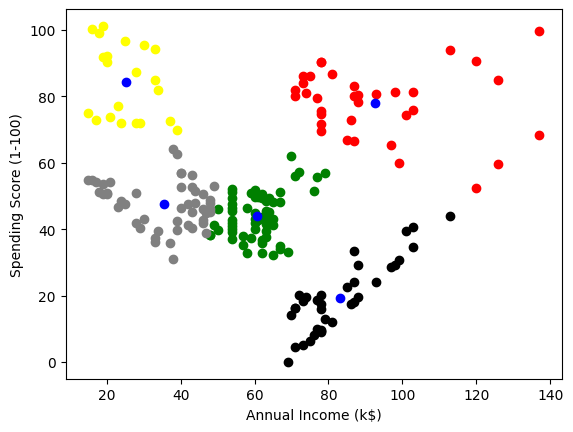

In [ ]:
color = ["red","green","yellow","grey","black"]
for i in range(k):
  data = X[X["Cluster"]==i+1]
  plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],color=color[i])
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],color="blue")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()